In [1]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from codebase import general, bh, fmm

In [2]:
particle_numbers = np.logspace(1, 6, 20, dtype=int)

terms = 6
theta = 0.5

max_time = 30

In [3]:
pair_times = []
bh_times = []
fmm_times = []

pair_done, bh_done, fmm_done = False, False, False

for num_particles in particle_numbers:
    print(f'Particles: {num_particles}')
    particles = [general.Particle() for _ in range(num_particles)]

    pair_method = general.Pairwise(particles)
    bh_method = bh.BH(particles, theta, terms)
    fmm_method = fmm.FMM(particles, terms)
    
    if not pair_done:
        print('Pair: ', end='')
        time = %timeit -o pair_method.do_method()
        pair_times.append(time)
        if time.average > max_time:
            pair_done = True
    
    if not bh_done:
        print('BH:   ', end='')
        time = %timeit -o bh_method.do_method()
        bh_times.append(time)
        if time.average > max_time:
            bh_done = True
    
    if not fmm_done:
        print('FMM:  ', end='')
        time = %timeit -o fmm_method.do_method()
        fmm_times.append(time)
        if time.average > max_time:
            fmm_done = True

Particles: 10
Pair: 120 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
BH:   883 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
FMM:  427 µs ± 9.32 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Particles: 18
Pair: 390 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
BH:   2.4 ms ± 47.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
FMM:  3.54 ms ± 3.87 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Particles: 33
Pair: 1.33 ms ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
BH:   5.88 ms ± 93.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
FMM:  4.19 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Particles: 61
Pair: 4.58 ms ± 6.66 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
BH:   16.9 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
FMM:  6.7 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Partic

In [4]:
pair_averages = [time.average for time in pair_times]
pair_stdevs = [time.stdev for time in pair_times]
bh_averages = [time.average for time in bh_times]
bh_stdevs = [time.stdev for time in bh_times]
fmm_averages = [time.average for time in fmm_times]
fmm_stdevs = [time.stdev for time in fmm_times]

In [6]:
pair_times_arr = np.array(pair_times)
bh_times_arr = np.array(bh_times)
fmm_times_arr = np.array(fmm_times)

SAVE_PATH = 'general.npz'
np.savez(SAVE_PATH, pair=pair_times_arr, bh=bh_times_arr, fmm=fmm_times_arr)

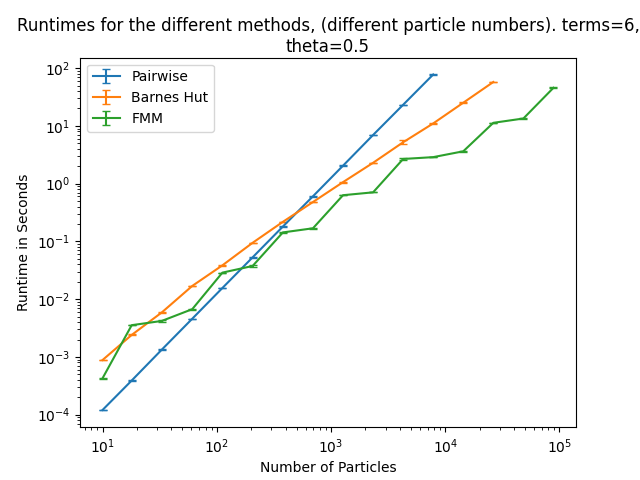

In [17]:
fig, ax = plt.subplots()

ax.errorbar(particle_numbers[:len(pair_averages)], pair_averages, pair_stdevs, capsize=3, label='Pairwise')
ax.errorbar(particle_numbers[:len(bh_averages)],   bh_averages,   bh_stdevs,   capsize=3, label='Barnes Hut')
ax.errorbar(particle_numbers[:len(fmm_averages)],  fmm_averages,  fmm_stdevs,  capsize=3, label='FMM')

# ax.plot(particle_numbers, particle_numbers*10**-3.7)

ax.set_title(f'Runtimes for the different methods, (different particle numbers). terms={terms}, theta={theta}', wrap=True)

# ax.set_aspect('equal')
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Number of Particles')
ax.set_ylabel('Runtime in Seconds')
ax.legend();